## 1. Naive Bayes

### Naïve Bayes 모형을 이용해서 서로 다른 카테고리의 텍스트를 판별하는 모형을 만들고자 한다. 데이터는 2개의 서로 다른 카테고리의 글이 섞여 있는데, 하나는 컴퓨터 그래픽에 대한 것이고 다른 하나는 우주 과학에 대한 것이다. 종속변수는 ‘y_target’인데 이 값이 0이면 컴퓨터 그래픽에 대한 글이고 1이면 우주 과학에 대한 것이다. 종속변수 이외의 모든 변수는 설명변수로 특정 단어를 의미하고 값은 특정 글에 해당 단어가 등장한 빈도를 뜻한다.

In [1]:
# DO NOT CHANGE THIS PART
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv('https://drive.google.com/uc?export=download&id=1ZdJM0WQTaw3D2JRSNgV1KSyN2_-b0o2k', index_col=0)
trn, test=train_test_split(data,test_size=0.2, shuffle=True, random_state=11)

(1) Multinomial naïve Bayes 모형을 이용해서 세팅이 변경없이 학습용 데이터로 학습을 하고 검증용 데이터를 이용해서 정확도(accuracy), recall, precision, f1 값을 구하시오 (컴퓨터 그래픽을 기준으로 계산할 것). 

In [2]:
train_X = trn.drop(['y_target'], axis=1)
train_y = trn.y_target
test_X = test.drop('y_target', axis=1)
test_y = test.y_target

multiNB = MultinomialNB()
multiNB.fit(train_X, train_y)
y_pred = multiNB.predict(test_X)

#tp, tn, fn, fp 분류
tp, tn, fn, fp = 0, 0, 0, 0
for target, pred in zip(test_y, y_pred):
    if (target==1 and pred==1):
        tp +=1
    elif (target==1 and pred==0):
        fn +=1
    elif (target==0 and pred==0):
        tn +=1
    elif (target==0 and pred==1):
        fp +=1

#accuracy: (tp+tn)/(tp+fn+fp+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)
# print(multiNB.score(test_X, test_y))

#recall: tp/(tp+fn)
recall = tp/(tp+fn)

#precision: tp/(tp+fp)
precision = tp/(tp+fp)

#f1: 2*precision x recall / (precision+recall)
f1 = 2*precision*recall/(precision+recall)

print(f'Accuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}\nF1: {f1}')


Accuracy: 0.9617346938775511
Recall: 0.9577464788732394
Precision: 0.9714285714285714
F1: 0.9645390070921985


(2) 학습된 Multinomial naïve Bayes 모형으로부터 서로 다른 두 카테고리(컴퓨터 그래픽과 우주 과학)에서 확률이 높은 단어 상위 10개씩을 찾으시오. 

In [3]:
space = multiNB.feature_log_prob_[0].argsort()[:10]
computer = multiNB.feature_log_prob_[1].argsort()[:10]
column = list(data)

for i, j, rank in zip(space, computer, range(1, 11)):
    print(f'space {rank}: {column[i]}')
    print(f'computer {rank}: {column[j]}')

space 1: zoology
computer 1: tiff
space 2: vehicle
computer 2: animation
space 3: vandalizing
computer 3: vga
space 4: henry
computer 4: algorithms
space 5: planets
computer 5: viewer
space 6: planet
computer 6: ms
space 7: atmosphere
computer 7: amiga
space 8: spacecraft
computer 8: screen
space 9: billion
computer 9: output
space 10: sky
computer 10: jpeg


(3) 전체 문서에서 등장 빈도가 높은 단어 30개를 찾고 그 단어에 대해서 서로 다른 두 카테고리에서의 1-(1)에서 학습된 multinomial naïve Bayes에서 추정한 단어들의 확률을 가로 막대 그래프로 그리시오. (겹쳐서 그리기 위해서 투명도인 alpha=0.5로 설정). 이 때 서로 다른 두 카테고리는 같은 figure에 그리고 범주를 넣으시오. 

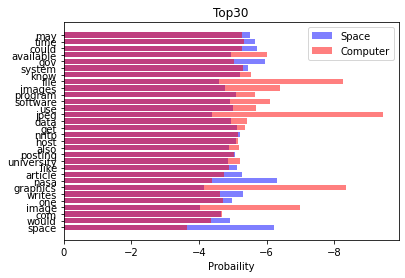

In [4]:
words = data.drop('y_target', axis=1).sum(axis=0).sort_values(ascending=False)[:30]
top30 = list(words.index)
column_test = list(test_X)

#space
space30 = []
for i in range(30):
    index = column_test.index(top30[i])
    space30.append(multiNB.feature_log_prob_[0][index])
    
#computer
computer30 = []
for i in range(30):
    index = column.index(top30[i])
    computer30.append(multiNB.feature_log_prob_[1][index])
    
fig, ax = plt.subplots()
y = range(30)
ax.barh(y, space30, color='blue', alpha=0.5, label='Space')
ax.barh(y, computer30, color='red', alpha=0.5, label='Computer')
ax.set_yticks(y)
ax.set_yticklabels(top30)
ax.invert_xaxis()
ax.set_xlabel('Probaility')
ax.set_title('Top30')
plt.legend()

plt.show()

(4) Bernoulli naïve Bayes 모형을 이용해서 세팅 변경 없이 train set으로 학습을 하고 test set을 이용해서 정확도(accuracy), recall, precision, f1 값을 구하시오 (컴퓨터 그래픽을 기준으로 계산할 것). 이 때 input matrix는 train set, test set 모두 특정 단어가 1번 이상이라도 쓰였으면 1, 아니면 0으로 변환하여 사용하시오. (1)의 결과와 비교하여 어느 쪽이 더 나은 모형인지 설명하시오. 이 결과로부터 알 수 있는 사실은 무엇인가? 

In [5]:
# binary data
test_binary = test_X.values.tolist()
train_binary = train_X.values.tolist()

for i in range(len(train_binary)):
    for j in range(len(train_binary[i])):
        if train_binary[i][j] > 0:
            train_binary[i][j] = 1
        else:
            train_binary[i][j] = 0
            
for i in range(len(test_binary)):
    for j in range(len(test_binary[i])):
        if test_binary[i][j] > 0:
            test_binary[i][j] = 1
        else:
            test_binary[i][j] = 0
            
dfTest_binary = pd.DataFrame(test_binary, columns=column_test)
dfTrain_binary = pd.DataFrame(train_binary, columns=column_test)

#bernoulliNB 생성
bernoulliNB = BernoulliNB()
bernoulliNB.fit(dfTrain_binary, train_y)
y_pred_bin = bernoulliNB.predict(dfTest_binary)

#tp, tn, fn, fp 분류
tp, tn, fn, fp = 0, 0, 0, 0
for target, pred in zip(test_y, y_pred_bin):
    if (target==1 and pred==1):
        tp +=1
    elif (target==1 and pred==0):
        fn +=1
    elif (target==0 and pred==0):
        tn +=1
    elif (target==0 and pred==1):
        fp +=1

#accuracy: (tp+tn)/(tp+fn+fp+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)
print(accuracy)
print(bernoulliNB.score(dfTest_binary, test_y))

#recall: tp/(tp+fn)
recall = tp/(tp+fn)
print(recall)

#precision: tp/(tp+fp)
precision = tp/(tp+fp)
print(precision)

#f1: 2*precision x recall / (precision+recall)
f1 = 2*precision*recall/(precision+recall)
print(f1)

0.9489795918367347
0.9489795918367347
0.9154929577464789
0.9898477157360406
0.9512195121951219


(5) 학습된 Bernoulli naïve Bayes 모형으로 test set의 sample별로 각 class에 대한 posterior probability를 구하고 서로 다른 cutoff를 기준이로 output label을 결정(우주 과학일 확률값을 기준으로 이 값이 cutoff 이상이면 우주 과학으로 분류)하고 이에 따른 정확도를 구하시오. 그리고 cutoff를 X축으로 정확도를 Y축으로 해서 그래프를 그리시오. (cutoff∈{0.1,0.15,0.2,0.25,...,0.95})

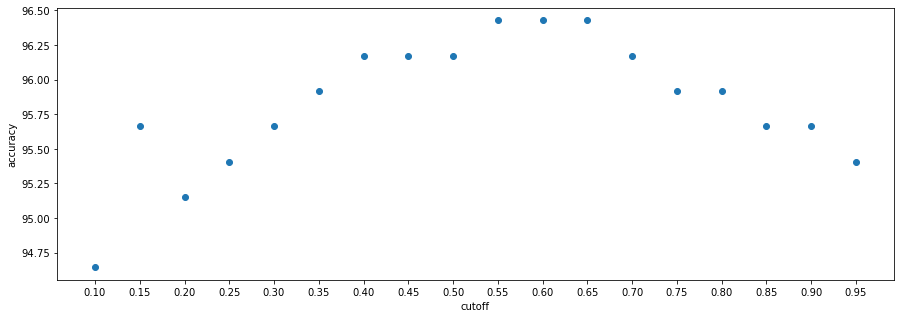

In [6]:

cutoff = list(np.arange(0.1, 1, 0.05))
for i in range(len(cutoff)):
    cutoff[i] = round(cutoff[i], 2)

probability = multiNB.predict_proba(test_X)

test_y = test_y.tolist()
over = []
accuracy = []
cnt = 0
for i in range(len(cutoff)):
    for j in range(len(probability)):
        if cutoff[i] < probability[j][1]:
            over.append(1)
        else:
            over.append(0)
    for k in range(len(over)):
        if over[k] == test_y[k]:
            cnt += 1
    accu = cnt/len(test_y)*100
    accuracy.append(accu)
    over=[]
    accu=0
    cnt=0

fig=plt.figure(figsize=(15,5))
plt.scatter(cutoff,accuracy)
plt.xlabel('cutoff')
plt.ylabel('accuracy')
plt.xticks(cutoff)
plt.show()

## 2. Decision Tree
### 다음 요소를 바탕으로 2007년 3월에 어떤 사람이 헌혈을 했는지(했으면 1 아니면 0)를 판별하고 한다.

(1) recency: 마지막으로 헌혈한 뒤 경과된 개월 수

(2) frequency: 총 헌혈 횟수

(3) monetary: 총 헌혈 양(cc)

(4) time: 첫 헌혈 후 경과된 개월 수

종속변수는 target으로 1 또는 0

In [7]:
# DO NOT CHANGE THIS PART
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score

data=pd.read_csv('https://drive.google.com/uc?export=download&id=1ds25l6300RnG7MMzRmtrHVdlUXmVsUvi')


(1) max_depth=4, min_samples_split=50, min_samples_leaf=25로 종속변수에 대한 decision tree를 gini impurity를 이용해서 학습하고 정확도, recall, precision을 구하시오. 이 때 recall과 precision의 경우 양쪽 class 기준으로 각각 구하시오.

In [8]:
from sklearn.model_selection import train_test_split

train, test=train_test_split(data, test_size=0.2, shuffle=True)

train_X = train.drop('target', axis=1)
train_y = train.target
test_X = test.drop('target', axis=1)
test_y = test.target

DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=50, min_samples_leaf=25)
DecisionTree.fit(train_X, train_y)
y_pred = DecisionTree.predict(test_X)
y_prob = DecisionTree.predict_proba(test_X)

#tp, tn, fn, fp 분류: class 1
tp, tn, fn, fp = 0, 0, 0, 0
for target, pred in zip(test_y, y_pred):
    if (target==1 and pred==1):
        tp +=1
    elif (target==1 and pred==0):
        fn +=1
    elif (target==0 and pred==0):
        tn +=1
    elif (target==0 and pred==1):
        fp +=1

#accuracy: (tp+tn)/(tp+fn+fp+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)
print(accuracy)
print(DecisionTree.score(test_X, test_y))

#recall: class 1
print('')
recall = tp/(tp+fn)
print(f'Class 1 Recall: {recall}')

#precision: class 1 
precision = tp/(tp+fp)
print(f'Class 1 Precision: {precision}')

#tp, tn, fn, fp 분류: class 0
tp, tn, fn, fp = 0, 0, 0, 0
for target, pred in zip(test_y, y_pred):
    if (target==0 and pred==0):
        tp +=1
    elif (target==0 and pred==1):
        fn +=1
    elif (target==1 and pred==1):
        tn +=1
    elif (target==1 and pred==0):
        fp +=1
        
# Recall: class 0
recall = tp/(tp+fn)
print(f'Class 0 Recall: {recall}')

# Precision: class 0
precision = tp/(tp+fp)
print(f'Class 0 Precision: {precision}')


0.8
0.8

Class 1 Recall: 0.12903225806451613
Class 1 Precision: 0.5714285714285714
Class 0 Recall: 0.9747899159663865
Class 0 Precision: 0.8111888111888111


(3) 위에서 학습된 tree를 그리시오. 

[Text(714.9375, 815.4, 'recency <= 6.5\ngini = 0.371\nsamples = 598\nvalue = [451, 147]\nclass = 0'),
 Text(383.625, 634.2, 'monetary <= 875.0\ngini = 0.479\nsamples = 300\nvalue = [181, 119]\nclass = 0'),
 Text(209.25, 453.0, 'time <= 12.0\ngini = 0.375\nsamples = 112\nvalue = [84, 28]\nclass = 0'),
 Text(139.5, 271.80000000000007, 'monetary <= 375.0\ngini = 0.413\nsamples = 79\nvalue = [56, 23]\nclass = 0'),
 Text(69.75, 90.60000000000002, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]\nclass = 0'),
 Text(209.25, 90.60000000000002, 'gini = 0.483\nsamples = 27\nvalue = [16, 11]\nclass = 0'),
 Text(279.0, 271.80000000000007, 'gini = 0.257\nsamples = 33\nvalue = [28, 5]\nclass = 0'),
 Text(558.0, 453.0, 'time <= 49.5\ngini = 0.499\nsamples = 188\nvalue = [97, 91]\nclass = 0'),
 Text(418.5, 271.80000000000007, 'frequency <= 6.5\ngini = 0.487\nsamples = 126\nvalue = [53, 73]\nclass = 1'),
 Text(348.75, 90.60000000000002, 'gini = 0.5\nsamples = 71\nvalue = [36, 35]\nclass = 0'),
 Text(488.2

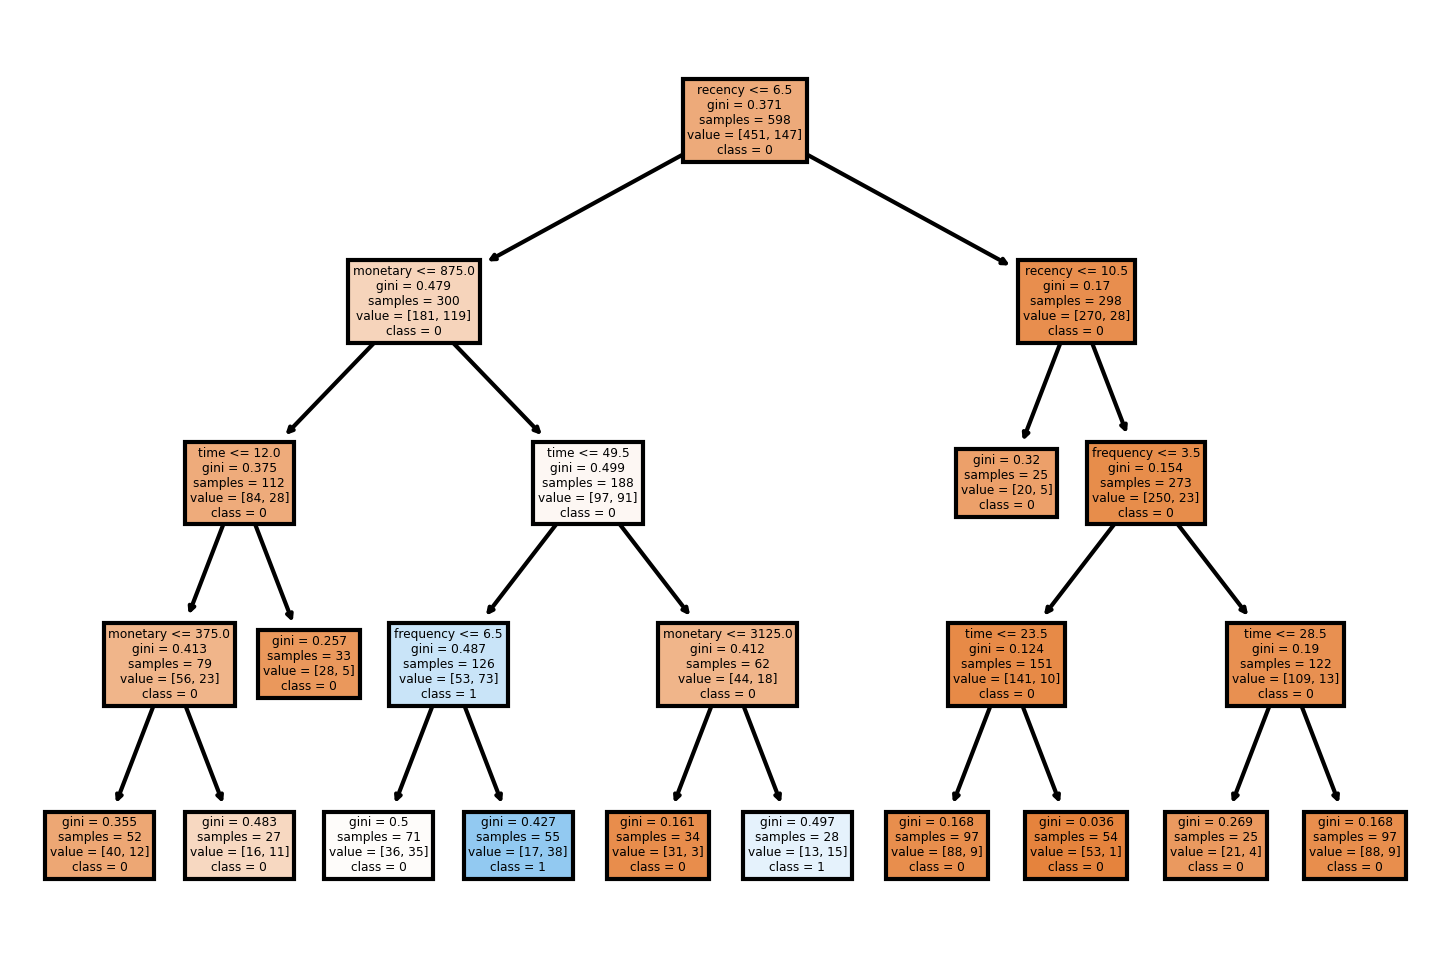

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_name = list(train_X.columns)
class_name = ['0', '1']

fig = plt.figure(dpi=300)
tree.plot_tree(DecisionTree, feature_names = feature_name, class_names=class_name, filled=True)

(5) min_samples_split=70, min_samples_leaf=35로 바꾸고 분기를 찾는 기준을 entropy로 변경했을 때 생성되는 규칙 측면에서 기존 모델과 어떠한 차이가 있는지 설명하시오. 

[Text(697.5, 815.4, 'recency <= 9.5\nentropy = 0.805\nsamples = 598\nvalue = [451, 147]\nclass = 0'),
 Text(387.5, 634.2, 'frequency <= 3.5\nentropy = 0.961\nsamples = 323\nvalue = [199, 124]\nclass = 0'),
 Text(232.5, 453.0, 'time <= 12.0\nentropy = 0.798\nsamples = 120\nvalue = [91, 29]\nclass = 0'),
 Text(155.0, 271.80000000000007, 'recency <= 2.5\nentropy = 0.861\nsamples = 81\nvalue = [58, 23]\nclass = 0'),
 Text(77.5, 90.60000000000002, 'entropy = 0.811\nsamples = 40\nvalue = [30, 10]\nclass = 0'),
 Text(232.5, 90.60000000000002, 'entropy = 0.901\nsamples = 41\nvalue = [28, 13]\nclass = 0'),
 Text(310.0, 271.80000000000007, 'entropy = 0.619\nsamples = 39\nvalue = [33, 6]\nclass = 0'),
 Text(542.5, 453.0, 'time <= 51.5\nentropy = 0.997\nsamples = 203\nvalue = [108, 95]\nclass = 0'),
 Text(465.0, 271.80000000000007, 'monetary <= 1625.0\nentropy = 0.989\nsamples = 135\nvalue = [59, 76]\nclass = 1'),
 Text(387.5, 90.60000000000002, 'entropy = 0.999\nsamples = 74\nvalue = [38, 36]\ncl

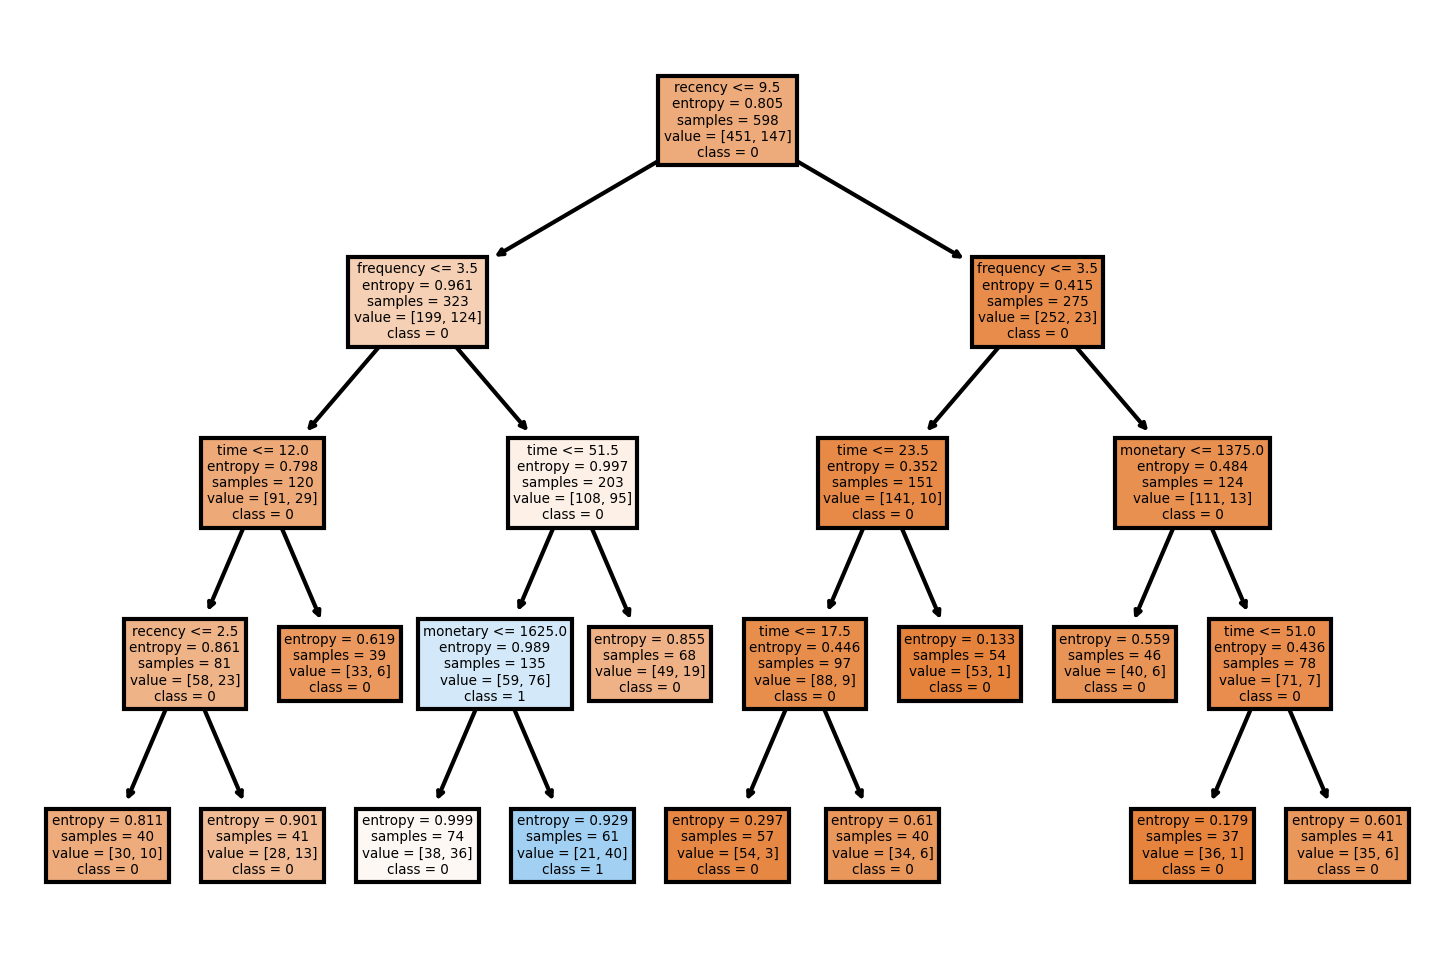

In [10]:
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=70, min_samples_leaf=35)
DecisionTree.fit(train_X, train_y)
y_pred = DecisionTree.predict(test_X)
y_prob = DecisionTree.predict_proba(test_X)

feature_name = list(train_X.columns)
class_name = ['0', '1']

fig = plt.figure(dpi=300)
tree.plot_tree(DecisionTree, feature_names = feature_name, class_names=class_name, filled=True)

## 3. $k$-neares neighbor model 학습
### nearest neighbor 방식을 이용해서 분류 문제를 해결하려고 한다. 사용하는 데이터는 날씨 정보를 이용해서 산불이 발생할지 판단하는 것을 목적으로 한다. 이 데이터는 총 11개의 변수로 구성되어 있고 이 중 month와 day를 기록 월과 요일이고 그 뒤의 8개의 변수(FFMC~rain)는 설명변수이고 마지막 ‘area’로 종속변수를 생성한다. 만약 불탄 면적이 0이면 0, 그보다 크면 1(산불 발생)로 변환하여 종속변수로 한다. 

1. month - month of the year
2. day - day of the week
3. FFMC - FFMC index from the FWI system
4. DMC - DMC index from the FWI system
5. DC - DC index from the FWI system
6. ISI - ISI index from the FWI system
7. temp - temperature in Celsius degrees
8. RH - relative humidity in %
9. wind - wind speed in km/h
10. rain - outside rain in mm/㎡
11. area - the burned area of the forest (in ha)

In [11]:
# DO NOT CHANGE THIS PART
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

data=pd.read_csv('https://drive.google.com/uc?export=download&id=1Yo_VK8ntbGWe6Z8cEKNrWINUrpxqMc0Z')

(1) 전체 데이터에서 요일별로 관측일자 중 산불이 발생한 비율을 계산하고 어떤 특징이 있는지 기술하시오. 

In [12]:
trn,val=train_test_split(data,test_size=0.2,random_state=78)

train_X = trn.drop('area', axis=1)
train_y = trn.area
for i in range(len(train_y)):
    if train_y.values[i]>0:
        train_y.values[i] = 1
        
test_X = val.drop('area', axis=1)
test_y = val.area
for i in range(len(test_y)):
    if test_y.values[i]>0:
        test_y.values[i] = 1

days = [0]*7
for i in range(len(data)):
    if data.day.values[i] == 'mon':
        days[0] += 1
    elif data.day.values[i] == 'tue':
        days[1] += 1
    elif data.day.values[i] == 'wed':
        days[2] += 1
    elif data.day.values[i] == 'thu':
        days[3] += 1
    elif data.day.values[i] == 'fri':
        days[4] += 1
    elif data.day.values[i] == 'sat':
        days[5] += 1
    elif data.day.values[i] == 'sun':
        days[6] += 1

week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(len(days)):
    ratio = days[i]/sum(days)*100
    print(f'{week[i]} = {ratio}')

Mon = 14.313346228239846
Tue = 12.379110251450678
Wed = 10.444874274661508
Thu = 11.798839458413926
Fri = 16.44100580270793
Sat = 16.247582205029012
Sun = 18.3752417794971


(2) k-NN 방식으로 예측을 하려고 한다. 이 때 가장 적절한 k를 결정하기 위해서 학습용 데이터로 검증용 데이터를 예측하고 검증용 데이터에서의 정확도를 비교해보고자 한다. k는 1, 5, 9, 11로 바꿔보면서 테스트 해본다고 했을 때 검증용 데이터에서의 정확도를 각각의 경우에 대해서 구하시오.

In [13]:
# Month to Number: train
for i in range(len(train_X)):
    if train_X.month.values[i] == 'jan':
        train_X.month.values[i] = 1
    elif train_X.month.values[i] == 'feb':
        train_X.month.values[i] = 2
    elif train_X.month.values[i] == 'mar':
        train_X.month.values[i] = 3
    elif train_X.month.values[i] == 'apr':
        train_X.month.values[i] = 4
    elif train_X.month.values[i] == 'may':
        train_X.month.values[i] = 5
    elif train_X.month.values[i] == 'jun':
        train_X.month.values[i] = 6
    elif train_X.month.values[i] == 'jul':
        train_X.month.values[i] = 7
    elif train_X.month.values[i] == 'aug':
        train_X.month.values[i] = 8
    elif train_X.month.values[i] == 'sep':
        train_X.month.values[i] = 9
    elif train_X.month.values[i] == 'oct':
        train_X.month.values[i] = 10
    elif train_X.month.values[i] == 'nov':
        train_X.month.values[i] = 11
    elif train_X.month.values[i] == 'dec':
        train_X.month.values[i] = 12

# Month to Number: test
for i in range(len(test_X)):
    if test_X.month.values[i] == 'jan':
        test_X.month.values[i] = 1
    elif test_X.month.values[i] == 'feb':
        test_X.month.values[i] = 2
    elif test_X.month.values[i] == 'mar':
        test_X.month.values[i] = 3
    elif test_X.month.values[i] == 'apr':
        test_X.month.values[i] = 4
    elif test_X.month.values[i] == 'may':
        test_X.month.values[i] = 5
    elif test_X.month.values[i] == 'jun':
        test_X.month.values[i] = 6
    elif test_X.month.values[i] == 'jul':
        test_X.month.values[i] = 7
    elif test_X.month.values[i] == 'aug':
        test_X.month.values[i] = 8
    elif test_X.month.values[i] == 'sep':
        test_X.month.values[i] = 9
    elif test_X.month.values[i] == 'oct':
        test_X.month.values[i] = 10
    elif test_X.month.values[i] == 'nov':
        test_X.month.values[i] = 11
    elif test_X.month.values[i] == 'dec':
        test_X.month.values[i] = 12

# Day to Number: 1~7 train
for i in range(len(train_X)):
    if train_X.day.values[i] == 'mon':
        train_X.day.values[i] = 1
    elif train_X.day.values[i] == 'tue':
        train_X.day.values[i] = 2
    elif train_X.day.values[i] == 'wed':
        train_X.day.values[i] = 3
    elif train_X.day.values[i] == 'thu':
        train_X.day.values[i] = 4
    elif train_X.day.values[i] == 'fri':
        train_X.day.values[i] = 5
    elif train_X.day.values[i] == 'sat':
        train_X.day.values[i] = 6
    elif train_X.day.values[i] == 'sun':
        train_X.day.values[i] = 7

# Day to Number: 1~7 test
for i in range(len(test_X)):
    if test_X.day.values[i] == 'mon':
        test_X.day.values[i] = 1
    elif test_X.day.values[i] == 'tue':
        test_X.day.values[i] = 2
    elif test_X.day.values[i] == 'wed':
        test_X.day.values[i] = 3
    elif test_X.day.values[i] == 'thu':
        test_X.day.values[i] = 4
    elif test_X.day.values[i] == 'fri':
        test_X.day.values[i] = 5
    elif test_X.day.values[i] == 'sat':
        test_X.day.values[i] = 6
    elif test_X.day.values[i] == 'sun':
        test_X.day.values[i] = 7

neighbors = [1,5,9,11]
for i in range(len(neighbors)):
    knn = KNeighborsClassifier(n_neighbors=neighbors[i], metric = 'manhattan')
    knn.fit(train_X, train_y)
    score = knn.score(test_X, test_y)
    print(f'K = {neighbors[i]} \n:{score}')

K = 1 
:0.6057692307692307
K = 5 
:0.5961538461538461
K = 9 
:0.5769230769230769
K = 11 
:0.5961538461538461


(3) 검증용 데이터 중에서 첫 번째 샘플의 20개의 neighbor를 해당 샘플과 함께 산포도로 그리시오. 이 때 사용하는 변수는 x축은 RH, y축은 wind로 하고 가장 가까운 10개와 나머지 10개에 대해서는 구분이 되도록 하시오(색이나 마커로). 또한, y축의 경우에는 (0, 50)까지를 표시하시오. 

[[9 2 91.0 129.5 692.6 7.0 18.3 40 2.7 0.0]]


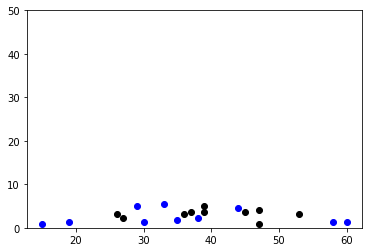

In [14]:
from sklearn.metrics import pairwise_distances

sam1=test_X[0:1].values
testX = test_X.values
print(sam1[:])
x1=[testX[i,0] for i in range(1,len(testX))]
x2=[testX[i,1] for i in range(1,len(testX))]
x3=[testX[i,2] for i in range(1,len(testX))]
x4=[testX[i,3] for i in range(1,len(testX))]
x5=[testX[i,4] for i in range(1,len(testX))]
x6=[testX[i,5] for i in range(1,len(testX))]
x7=[testX[i,6] for i in range(1,len(testX))]
x8=[testX[i,7] for i in range(1,len(testX))]
x9=[testX[i,8] for i in range(1,len(testX))]
x10=[testX[i,9] for i in range(1,len(testX))]

train=pd.DataFrame(data={'x1':x1,'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'x7':x7,'x8':x8,'x9':x9,'x10':x10})

train['dist'] = pairwise_distances(sam1,train, metric='euclidean')[0]
sort_train=train.sort_values(by=['dist'],axis=0)

num=20

sample20_ind=sort_train.iloc[range(num)].index.values
knn_ind=sample20_ind[:10]
not_nn_ind=sample20_ind[10:]

plt.scatter(train.loc[not_nn_ind,'x8'],train.loc[not_nn_ind,'x9'],c='k')
plt.scatter(train.loc[knn_ind,'x8'],train.loc[knn_ind,'x9'],c='b')
plt.ylim((0, 50))
plt.show()

(4) 이번에는 같은 데이터를 이용해서 예측을 진행하는데 그 전에 전체 데이터에 대해서 개별 변수를 표준화하고자 한다. 개별 변수를 평균은 0, 분산이 1이 되게끔 표준화하는 함수를 작성하고 이를 이용해서 전체 데이터를 표준화한 다음에 (1)에서 사용한 것과 동일하게 학습용 데이터와 검증용 데이터로 분할한 다음(X자리에 표준화한 데이터를 넣을 것)에 서로 다른 k=[1, 5, 9, 11]에 대한 검증용 데이터에 대한 정확도를 계산하시오. 

In [15]:

def standard_regularization(list): #표준정규화함수
    mu=np.mean(list)
    var=np.var(list)
    for i in range(len(list)): #표준화
        list[i]=(list[i]-mu)/np.sqrt(var)
    return list

X = pd.concat([train_X, test_X])
X = X.values

Xcopy= X.copy()

x1=standard_regularization([X[i][0] for i in range(len(Xcopy))])
x2=standard_regularization([X[i][1] for i in range(len(Xcopy))])
x3=standard_regularization([X[i][2] for i in range(len(Xcopy))])
x4=standard_regularization([X[i][3] for i in range(len(Xcopy))])
x5=standard_regularization([X[i][4] for i in range(len(Xcopy))])
x6=standard_regularization([X[i][5] for i in range(len(Xcopy))])
x7=standard_regularization([X[i][6] for i in range(len(Xcopy))])
x8=standard_regularization([X[i][7] for i in range(len(Xcopy))])
x9=standard_regularization([X[i][8] for i in range(len(Xcopy))])
x10=standard_regularization([X[i][9] for i in range(len(Xcopy))])

newX=[[x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i]] for i in range(len(x1))]
newX=np.array(newX)
y = data['area']
for i in range(len(y)):
    if y.values[i]>0:
        y.values[i] = 1
y = y.values
        
trnX,valX,trnY,valY=train_test_split(newX,y,test_size=0.2,random_state=10, stratify=y)

knnmd=KNeighborsClassifier(n_neighbors=1)
knnmd.fit(trnX,trnY)
y_pred=knnmd.predict(valX)
print("k=1: ",knnmd.score(valX,valY))

knnmd=KNeighborsClassifier(n_neighbors=5)
knnmd.fit(trnX,trnY)
y_pred=knnmd.predict(valX)
print("k=5: ",knnmd.score(valX,valY))

knnmd=KNeighborsClassifier(n_neighbors=9)
knnmd.fit(trnX,trnY)
y_pred=knnmd.predict(valX)
print("k=9: ",knnmd.score(valX,valY))

knnmd=KNeighborsClassifier(n_neighbors=11)
knnmd.fit(trnX,trnY)
y_pred=knnmd.predict(valX)
print("k=11: ",knnmd.score(valX,valY))

k=1:  0.47115384615384615
k=5:  0.47115384615384615
k=9:  0.4807692307692308
k=11:  0.5384615384615384


(5) 표준화한 데이터를 이용해서 (2)에 지시한 사항을 동일하게 반복한 산포도를 그리시오. 단 이때는 x축의 범위는 (-2, 2), y축의 범위는 (-2, 2)로 해서 그리시오. 그리고 (2)의 결과와 어떤 차이가 있는지 설명하시오. 

[[9 2 91.0 129.5 692.6 7.0 18.3 40 2.7 0.0]]


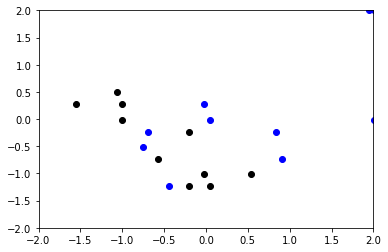

In [16]:
sam1=test_X[0:1].values
testX = test_X.values
print(sam1[:])
x1=[valX[i,0] for i in range(1,len(valX))]
x2=[valX[i,1] for i in range(1,len(valX))]
x3=[valX[i,2] for i in range(1,len(valX))]
x4=[valX[i,3] for i in range(1,len(valX))]
x5=[valX[i,4] for i in range(1,len(valX))]
x6=[valX[i,5] for i in range(1,len(valX))]
x7=[valX[i,6] for i in range(1,len(valX))]
x8=[valX[i,7] for i in range(1,len(valX))]
x9=[valX[i,8] for i in range(1,len(valX))]
x10=[valX[i,9] for i in range(1,len(valX))]

train=pd.DataFrame(data={'x1':x1,'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'x7':x7,'x8':x8,'x9':x9,'x10':x10})

train['dist']=pairwise_distances(sam1,train,metric='euclidean')[0]
sort_train=train.sort_values(by=['dist'],axis=0)

num=20

sample20_ind=sort_train.iloc[range(num)].index.values
knn_ind=sample20_ind[:10]
not_nn_ind=sample20_ind[10:]

plt.scatter(train.loc[not_nn_ind,'x8'],train.loc[not_nn_ind,'x9'],c='k')
plt.scatter(train.loc[knn_ind,'x8'],train.loc[knn_ind,'x9'],c='b')
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.show()
